In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import yfinance as yf
from datetime import datetime

# Importing the dataset

In [2]:
# Set the ticker symbol for Bank Nifty
ticker = "AAPL"

# Download the data from Yahoo Finance for a specific date range
data = yf.download(ticker, start="2015-01-01", end=datetime.today())

[*********************100%***********************]  1 of 1 completed


In [3]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,27.847500,27.860001,26.837500,27.332500,24.565702,212818400
2015-01-05,27.072500,27.162500,26.352501,26.562500,23.873634,257142000
2015-01-06,26.635000,26.857500,26.157499,26.565001,23.875887,263188400
2015-01-07,26.799999,27.049999,26.674999,26.937500,24.210686,160423600
2015-01-08,27.307501,28.037500,27.174999,27.972500,25.140909,237458000
...,...,...,...,...,...,...
2023-05-02,170.089996,170.350006,167.539993,168.539993,168.539993,48425700
2023-05-03,169.500000,170.919998,167.160004,167.449997,167.449997,65136000
2023-05-04,164.889999,167.039993,164.309998,165.789993,165.789993,81235400


# Data Preprocessing

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2101 entries, 2015-01-02 to 2023-05-08
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2101 non-null   float64
 1   High       2101 non-null   float64
 2   Low        2101 non-null   float64
 3   Close      2101 non-null   float64
 4   Adj Close  2101 non-null   float64
 5   Volume     2101 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 114.9 KB


In [5]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,27.847500,27.860001,26.837500,27.332500,24.565702,212818400
2015-01-05,27.072500,27.162500,26.352501,26.562500,23.873634,257142000
2015-01-06,26.635000,26.857500,26.157499,26.565001,23.875887,263188400
2015-01-07,26.799999,27.049999,26.674999,26.937500,24.210686,160423600
2015-01-08,27.307501,28.037500,27.174999,27.972500,25.140909,237458000


In [6]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-05-02,170.089996,170.350006,167.539993,168.539993,168.539993,48425700
2023-05-03,169.500000,170.919998,167.160004,167.449997,167.449997,65136000
2023-05-04,164.889999,167.039993,164.309998,165.789993,165.789993,81235400
2023-05-05,170.979996,174.300003,170.759995,173.570007,173.570007,113316400
2023-05-08,172.479996,173.850006,172.110001,173.500000,173.500000,55932100


In [7]:
data.shape

(2101, 6)

In [8]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2101.000000,2101.000000,2101.000000,2101.000000,2101.000000,2.101000e+03
mean,76.279955,77.159059,75.451474,76.345117,74.661782,1.290087e+08
std,50.524297,51.193501,49.902278,50.581003,51.108082,6.786729e+07
min,22.500000,22.917500,22.367500,22.584999,20.883032,3.519590e+07
25%,32.965000,33.235001,32.775002,33.017502,30.076763,8.360320e+07
50%,50.145000,50.712502,49.787498,50.310001,48.879421,1.097429e+08
75%,129.199997,131.000000,127.970001,129.740005,128.809494,1.535324e+08
max,182.630005,182.940002,179.119995,182.009995,180.683853,6.488252e+08


# Missing values

In [9]:
data.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [10]:
import plotly.express as px
import matplotlib.pyplot as plt

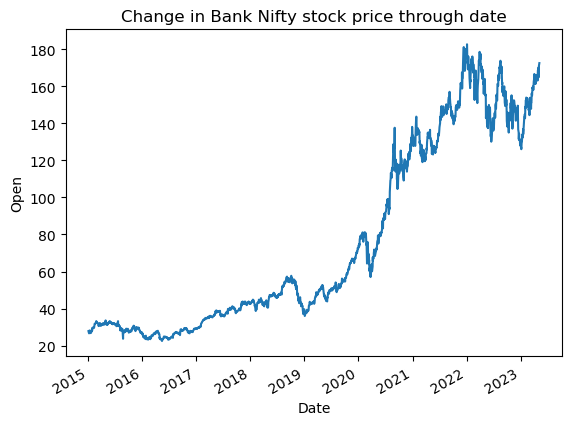

In [11]:

# plot price of gold for each increasing day
data["Open"].plot()
plt.title("Change in Bank Nifty stock price through date")
plt.xlabel("Date")
plt.ylabel("Open")
plt.show()

# Splitting X and Y into taining and testing varaibles

In [12]:
X=data[['Open','High','Low']]
y=data['Close']

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

In [14]:
X_train.shape,X_test.shape


((1575, 3), (526, 3))

In [15]:
y_train.shape,y_test.shape

((1575,), (526,))

# Random Forest

In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [17]:
regressor = RandomForestRegressor(n_estimators=100)

In [18]:
regressor.fit(X_train,y_train)

RandomForestRegressor()

In [19]:
# prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [20]:
print(test_data_prediction)

[143.31860062 128.41640076  24.17567495 159.58920105  24.64852486
 152.5977002   23.7221747   51.95372578  24.50045     30.28522467
  29.14042494  50.20939991 160.68250107 157.15109909  34.81995029
  43.69882519  48.09322483  51.01372551  24.96547514 146.35390045
 164.3692012   72.91604774 143.14369843 164.63250229  69.90619804
 126.00762527  51.88927593 145.80820236 175.28399963  27.02852484
 148.47989716 148.88549957  32.40647469  90.22789917 114.32919823
 166.09460098 116.59752464  47.46360062 178.35600266  47.83342529
  52.3885741   26.81002537 157.12399826  31.43472532  50.97365028
  38.9816      90.96469765 175.30719849 169.58199905  31.37475035
  56.36062531  54.91082527 174.57319839  51.69845058 115.29162369
 150.42810181  27.87829967 114.53092438  27.99377495 152.17979752
  51.57300022  36.59652462 125.76027428  33.99287491 132.32240143
  57.10827503 164.27490189  24.23397511  63.35145042  38.22710011
  35.44087543  54.64859978  27.43089968  47.14790043  28.92129976
  60.99732

In [21]:
# R squared errorY
error_score = metrics.r2_score(y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9996623915521012


In [22]:
y_test=list(y_test)

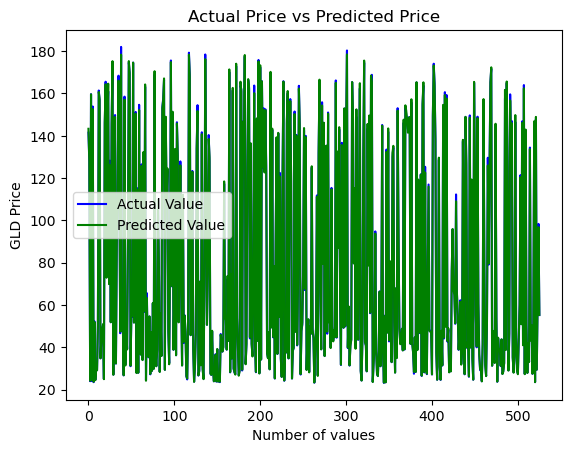

In [23]:
plt.plot(y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

# Training the model using linear regression

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
model=LinearRegression()


In [26]:
model.fit(X_train,y_train)

LinearRegression()

In [27]:
y_pred = model.predict(X_test)

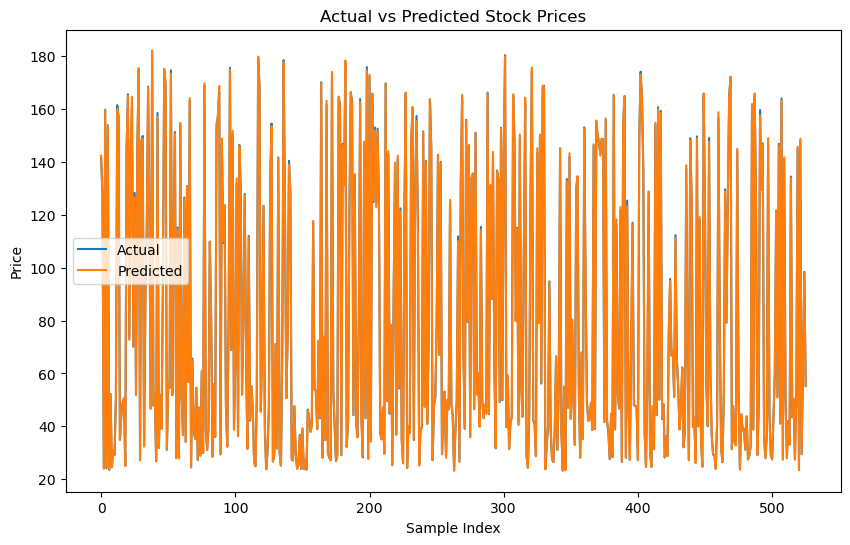

In [28]:
# Visualize the actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title('Actual vs Predicted Stock Prices')
plt.xlabel('Sample Index')
plt.ylabel('Price')
plt.legend()
plt.show()

In [29]:
reg=LinearRegression()
reg.fit(X,y)

LinearRegression()

In [30]:
prediction=reg.predict(X)

In [31]:
prediction

array([ 27.04424422,  26.56978874,  26.44152872, ..., 166.20694167,
       173.58728684, 173.29456302])

In [32]:
Open=float(input("enter a value"))
High=float(input("enter a value"))
Low=float(input("enter a value"))

data = np.array([[Open,High,Low]])
pred_value = model.predict(data)[0]

print(pred_value)

enter a value654
enter a value35
enter a value45
-363.50287057232697


C:\Users\reham\AppData\Local\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [34]:
import pickle
file=open("AAPL_model.pkl",'wb')
pickle.dump(model,file)